<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
!wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

--2022-11-28 12:24:19--  https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr
Resolving doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-11-28 12:24:19 ERROR 403: Forbidden.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('drive/My Drive/Facebook-Recommendation/Data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('drive/My Drive/Facebook-Recommendation/Data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [5]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [8]:
df_final_test.shape

(50002, 51)

In [9]:
df_final_train.shape

(100002, 51)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

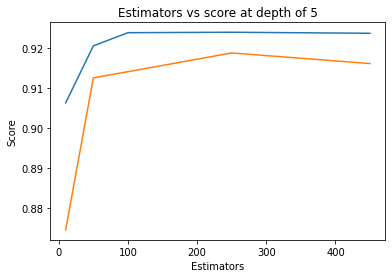

In [10]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


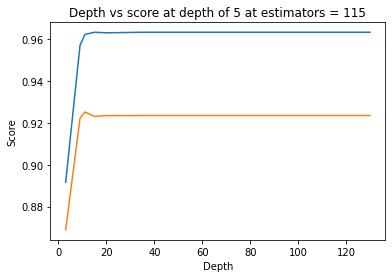

In [11]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [12]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,return_train_score=True,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225042 0.96215492 0.9605708  0.96194014 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [13]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [14]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [15]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [16]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [17]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


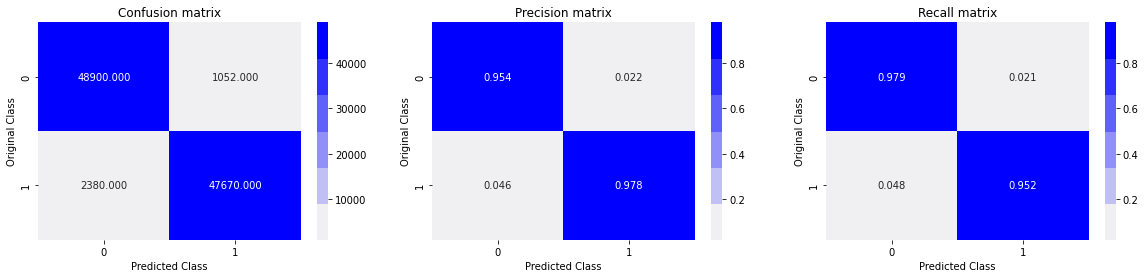

Test confusion_matrix


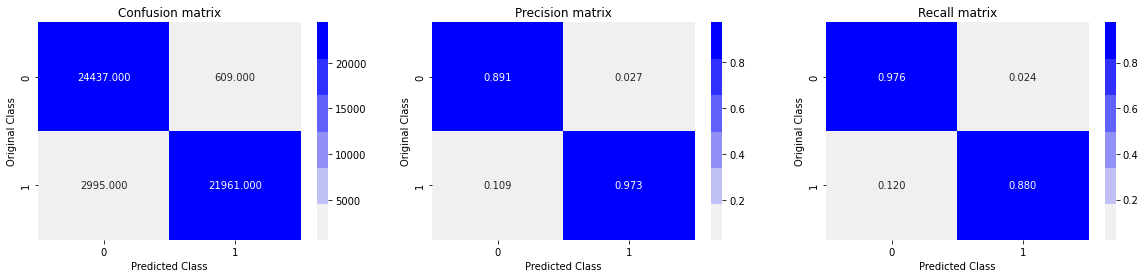

In [18]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

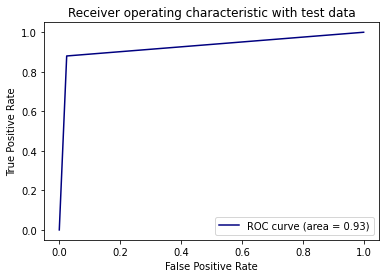

In [19]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

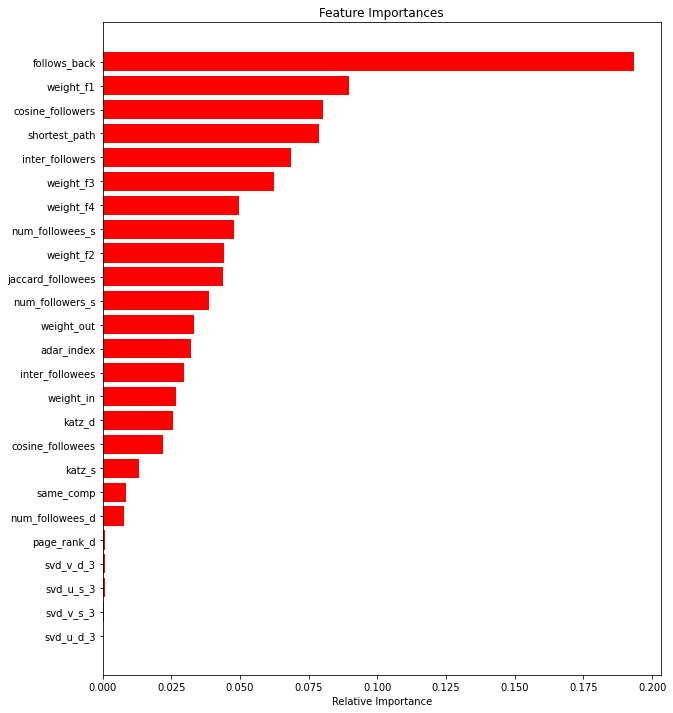

In [20]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance') 
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

**1. Preferential Attachment**

https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/preferential-attachment/#:~:text=Preferential%20attachment%20means%20that%20the,of%20nodes%20adjacent%20to%20u%20.

                     Preferential Attachement = |X| * |Y|







In [21]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('drive/My Drive/Facebook-Recommendation/Data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('drive/My Drive/Facebook-Recommendation/Data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [22]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [23]:
y_train.shape
#y_test.shape

(100002,)

In [24]:
#for followees
def pref_att_for_followees(a,b):
    try:
        return len(set(train_graph.successors(a))) * len(set(train_graph.successors(b)))
    except:
        return 0

In [25]:
#for followers
def pref_att_for_followers(a,b):
    try:
        return len(set(train_graph.predecessors(a)))* len(set(train_graph.predecessors(b)))
    except:
        return 0

In [26]:
if not os.path.isfile('data/fea_sample/storage_sample_stage5.h5'):
    #mapping Preferential Attachment followers to train and test data
    df_final_train['preferential_attachment_followers'] = df_final_train.apply(lambda row:
                                            pref_att_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['preferential_attachment_followers'] = df_final_test.apply(lambda row:
                                            pref_att_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping Preferential Attachment followees to train and test data
    df_final_train['preferential_attachment_followees'] = df_final_train.apply(lambda row:
                                            pref_att_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['preferential_attachment_followees'] = df_final_test.apply(lambda row:
                                            pref_att_for_followees(row['source_node'],row['destination_node']),axis=1)
    
    hdf = HDFStore('drive/My Drive/Facebook-Recommendation/Data/fea_sample/storage_sample_stage5.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('drive/My Drive/Facebook-Recommendation/Data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
    df_final_test = read_hdf('drive/My Drive/Facebook-Recommendation/Data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')

In [27]:
df_final_test.shape

(50002, 56)

In [28]:
df_final_train.shape

(100002, 56)

In [29]:
#for train dataset
us1,us2,us3,us4,us5,us6 = df_final_train['svd_u_s_1'],df_final_train['svd_u_s_2'],df_final_train['svd_u_s_3'],df_final_train['svd_u_s_4'],df_final_train['svd_u_s_5'],df_final_train['svd_u_s_6']
vs1,vs2,vs3,vs4,vs5,vs6 = df_final_train['svd_v_s_1'],df_final_train['svd_v_s_2'],df_final_train['svd_v_s_3'],df_final_train['svd_v_s_4'],df_final_train['svd_v_s_5'],df_final_train['svd_v_s_6']

ud1,ud2,ud3,ud4,ud5,ud6 = df_final_train['svd_u_d_1'],df_final_train['svd_u_d_2'],df_final_train['svd_u_d_3'],df_final_train['svd_u_d_4'],df_final_train['svd_u_d_5'],df_final_train['svd_u_d_6']
vd1,vd2,vd3,vd4,vd5,vd6 = df_final_train['svd_v_d_1'],df_final_train['svd_v_d_2'],df_final_train['svd_v_d_3'],df_final_train['svd_v_d_4'],df_final_train['svd_v_d_5'],df_final_train['svd_v_d_6']
 

In [30]:
svd_dot=[]
for i in range(len(np.array(us1))):
    usd=[]
    vsd=[]
    usd.append(np.array(us1[i]))
    usd.append(np.array(us2[i]))
    usd.append(np.array(us3[i]))
    usd.append(np.array(us4[i]))
    usd.append(np.array(us5[i]))
    usd.append(np.array(us6[i]))
    usd.append(np.array(vs1[i]))
    usd.append(np.array(vs2[i]))
    usd.append(np.array(vs3[i]))
    usd.append(np.array(vs4[i]))
    usd.append(np.array(vs5[i]))
    usd.append(np.array(vs6[i]))
    vsd.append(np.array(ud1[i]))
    vsd.append(np.array(ud2[i]))
    vsd.append(np.array(ud3[i]))
    vsd.append(np.array(ud4[i]))
    vsd.append(np.array(ud5[i]))
    vsd.append(np.array(ud6[i]))
    vsd.append(np.array(vd1[i]))
    vsd.append(np.array(vd2[i]))
    vsd.append(np.array(vd3[i]))
    vsd.append(np.array(vd4[i]))
    vsd.append(np.array(vd5[i]))
    vsd.append(np.array(vd6[i]))
    svd_dot.append(np.dot(usd,vsd))
df_final_train['svd_dot']=svd_dot   

In [31]:
#for test dataset
us1,us2,us3,us4,us5,us6 =df_final_test['svd_u_s_1'],df_final_test['svd_u_s_2'],df_final_test['svd_u_s_3'],df_final_test['svd_u_s_4'],df_final_test['svd_u_s_5'],df_final_test['svd_u_s_6']
vs1,vs2,vs3,vs4,vs5,vs6 =df_final_test['svd_v_s_1'],df_final_test['svd_v_s_2'],df_final_test['svd_v_s_3'],df_final_test['svd_v_s_4'],df_final_test['svd_v_s_5'],df_final_test['svd_v_s_6']

ud1,ud2,ud3,ud4,ud5,ud6 =df_final_test['svd_u_d_1'],df_final_test['svd_u_d_2'],df_final_test['svd_u_d_3'],df_final_test['svd_u_d_4'],df_final_test['svd_u_d_5'],df_final_test['svd_u_d_6']
vd1,vd2,vd3,vd4,vd5,vd6 =df_final_test['svd_v_d_1'],df_final_test['svd_v_d_2'],df_final_test['svd_v_d_3'],df_final_test['svd_v_d_4'],df_final_test['svd_v_d_5'],df_final_test['svd_v_d_6']
 

In [32]:
svd_dot=[]
for i in range(len(np.array(us1))):
    usd=[]
    vsd=[]
    usd.append(np.array(us1[i]))
    usd.append(np.array(us2[i]))
    usd.append(np.array(us3[i]))
    usd.append(np.array(us4[i]))
    usd.append(np.array(us5[i]))
    usd.append(np.array(us6[i]))
    usd.append(np.array(vs1[i]))
    usd.append(np.array(vs2[i]))
    usd.append(np.array(vs3[i]))
    usd.append(np.array(vs4[i]))
    usd.append(np.array(vs5[i]))
    usd.append(np.array(vs6[i]))
    vsd.append(np.array(ud1[i]))
    vsd.append(np.array(ud2[i]))
    vsd.append(np.array(ud3[i]))
    vsd.append(np.array(ud4[i]))
    vsd.append(np.array(ud5[i]))
    vsd.append(np.array(ud6[i]))
    vsd.append(np.array(vd1[i]))
    vsd.append(np.array(vd2[i]))
    vsd.append(np.array(vd3[i]))
    vsd.append(np.array(vd4[i]))
    vsd.append(np.array(vd5[i]))
    vsd.append(np.array(vd6[i]))
    svd_dot.append(np.dot(usd,vsd))
df_final_test['svd_dot']=svd_dot   

In [33]:
df_final_train.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followers,preferential_attachment_followees,svd_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0,1.338835e-11
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0,4.099684e-03


In [34]:
df_final_test.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followers,preferential_attachment_followees,svd_dot
0,848424,784690,1,0,0.0,0.029161,0.0,14,6,9,...,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0,2.083233e-17
1,483294,1255532,1,0,0.0,0.000000,0.0,17,1,19,...,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0,2.540536e-17


In [35]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_followers',
       'preferential_attachment_followees', 'svd_dot'],
      dtype='object')

In [36]:
# Random Forest model after add all features
param_dist = {"n_estimators":sp_randint(105,300),
              "max_depth": sp_randint(10,20),
              "min_samples_split": sp_randint(100,200),
              "min_samples_leaf": sp_randint(25,70)}

clf_rf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist,return_train_score=True,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random_search.fit(df_final_train,y_train)
print('mean test scores',rf_random_search.cv_results_['mean_test_score'])
print('mean train scores',rf_random_search.cv_results_['mean_train_score'])

best_params_rdsearch = rf_random_search.best_params_   
best_score_rf = rf_random_search.best_score_

print("Best Params from RandomSearchCV for Random Forest Classifier ", best_params_rdsearch)     
print("Best score",best_score_rf)

mean test scores [1. 1. 1. 1. 1.]
mean train scores [1. 1. 1. 1. 1.]
Best Params from RandomSearchCV for Random Forest Classifier  {'max_depth': 14, 'min_samples_leaf': 51, 'min_samples_split': 115, 'n_estimators': 166}
Best score 1.0


Accuracy 1.0


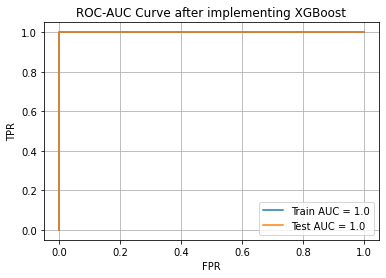

In [37]:
from sklearn.metrics import accuracy_score

rdf_clf = RandomForestClassifier(max_depth = 14, min_samples_leaf = 51, min_samples_split = 115, n_estimators = 166)
rdf_clf.fit(df_final_train,y_train)   

y_train_predicted_rdf = rdf_clf.predict(df_final_train)
y_test_predicted_rdf = rdf_clf.predict(df_final_test)

rdf_train_fpr, rdf_train_tpr, rdf_train_threshold = roc_curve(y_train, y_train_predicted_rdf)
rdf_test_fpr, rdf_test_tpr, rdf_test_threshold = roc_curve(y_test, y_test_predicted_rdf)

Accuracy_of_Model_rdfc = accuracy_score(y_test,y_test_predicted_rdf)
print("Accuracy",Accuracy_of_Model_rdfc)

# calculate scores
train_auc_rdfc = str(auc(rdf_train_fpr, rdf_train_tpr))
test_auc_rdfc = str(auc(rdf_test_fpr, rdf_test_tpr))    

                                            
plt.plot(rdf_train_fpr, rdf_train_tpr, label="Train AUC = "+train_auc_rdfc)    
plt.plot(rdf_test_fpr, rdf_test_tpr, label="Test AUC = "+test_auc_rdfc)


plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC-AUC Curve after implementing XGBoost')
plt.show()

In [38]:
train_f1_score_rf = f1_score(y_train,y_train_predicted_rdf)
test_f1_score_rf = f1_score(y_test,y_test_predicted_rdf)
print('Train f1 score',train_f1_score_rf)
print('Test f1 score',test_f1_score_rf)

Train f1 score 1.0
Test f1 score 1.0


Train confusion_matrix


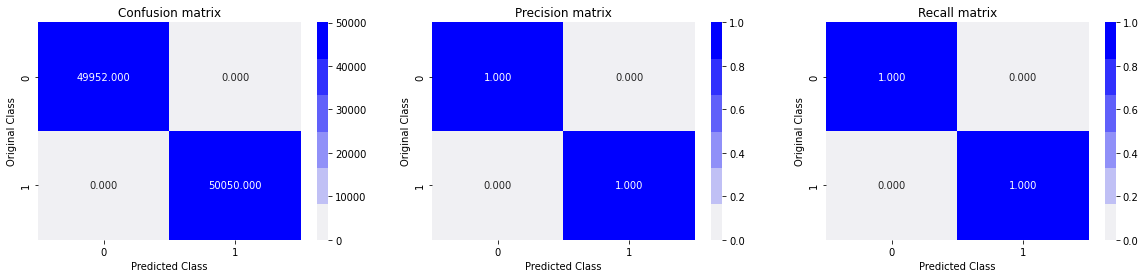

Test confusion_matrix


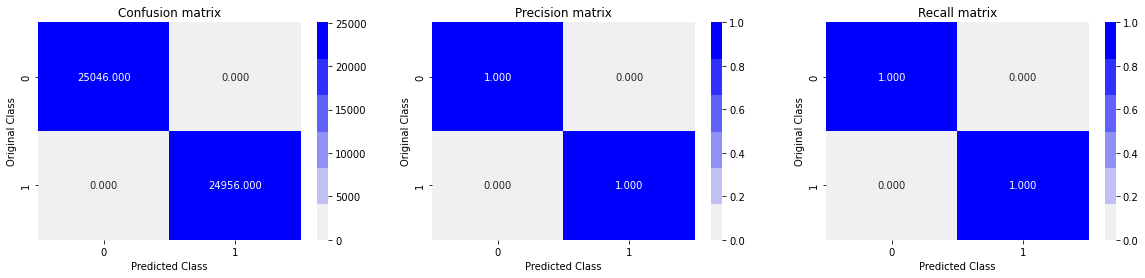

In [39]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_predicted_rdf)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_predicted_rdf)

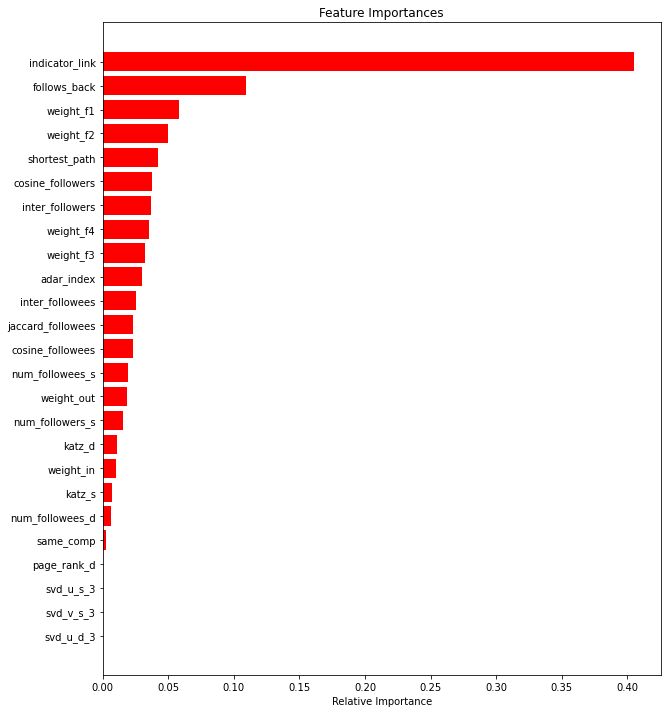

In [41]:
features = df_final_train.columns
importances = rdf_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier()

params = {"learning_rate" : uniform(0.001,0.3),
              "n_estimators" : sp_randint(10,600),
              "max_depth"    : sp_randint(5,20)}

rs_xgb = RandomizedSearchCV(xgb_clf, param_distributions=params,return_train_score=True,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rs_xgb.fit(df_final_train,y_train)

best_params_rndsearch_xgb = rs_xgb.best_params_
best_score_xgb = rs_xgb.best_score_

print('mean test scores',rs_xgb.cv_results_['mean_test_score'])
print('mean train scores',rs_xgb.cv_results_['mean_train_score'])

print("Best Params from RandomSearchCV with XGB ", best_params_rndsearch_xgb)
print("Best score",best_score_xgb)

#Accuracy_of_Model_xgb = accuracy_score(y_test,y_train_pred)

mean test scores [1. 1. 1. 1. 1.]
mean train scores [1. 1. 1. 1. 1.]
Best Params from RandomSearchCV with XGB  {'learning_rate': 0.26203724098816356, 'max_depth': 15, 'n_estimators': 153}
Best score 1.0


In [43]:
print(rs_xgb.best_estimator_)

XGBClassifier(learning_rate=0.26203724098816356, max_depth=15, n_estimators=153)


Accuracy 1.0


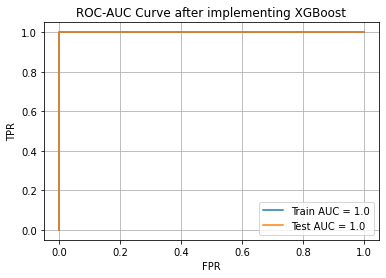

In [44]:
xgb_clf = XGBClassifier(learning_rate = 0.26203724098816356, max_depth = 15, n_estimators=153)
xgb_clf.fit(df_final_train, y_train)   

y_train_predicted_xgb = xgb_clf.predict(df_final_train)
y_test_predicted_xgb = xgb_clf.predict(df_final_test)

xgb_train_fpr, xgb_train_tpr, xgb_train_threshold = roc_curve(y_train, y_train_predicted_xgb)
xgb_test_fpr, xgb_test_tpr, xgb_test_threshold = roc_curve(y_test, y_test_predicted_xgb)

Accuracy_of_Model_xgb = accuracy_score(y_test,y_test_predicted_xgb)
print("Accuracy",Accuracy_of_Model_xgb)

# calculate scores
train_auc_xgb = str(auc(xgb_train_fpr, xgb_train_tpr))
test_auc_xgb = str(auc(xgb_test_fpr, xgb_test_tpr))    

                                            
plt.plot(xgb_train_fpr, xgb_train_tpr, label="Train AUC = "+train_auc_xgb)    
plt.plot(xgb_test_fpr, xgb_test_tpr, label="Test AUC = "+test_auc_xgb)


plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC-AUC Curve after implementing XGBoost')
plt.show()

In [45]:
train_f1_score_xgb = f1_score(y_train,y_train_predicted_xgb)
test_f1_score_xgb = f1_score(y_test,y_test_predicted_xgb)
print('Train f1 score',train_f1_score_xgb)
print('Test f1 score',test_f1_score_xgb)

Train f1 score 1.0
Test f1 score 1.0


Train confusion_matrix


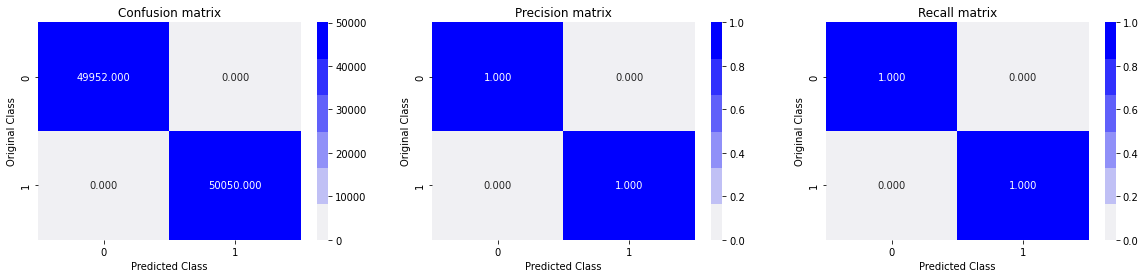

Test confusion_matrix


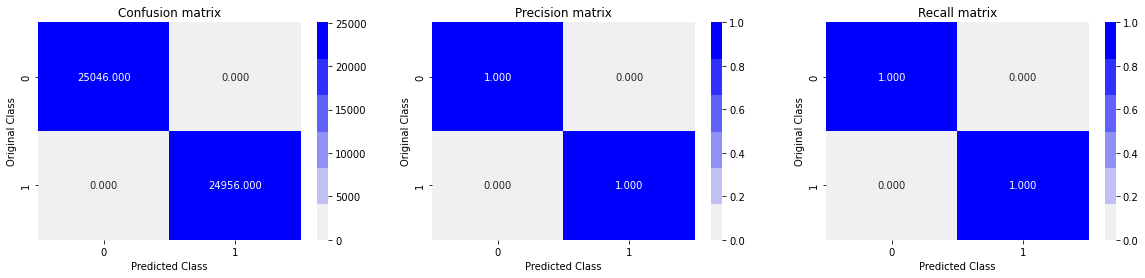

In [46]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_predicted_xgb)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_predicted_xgb)

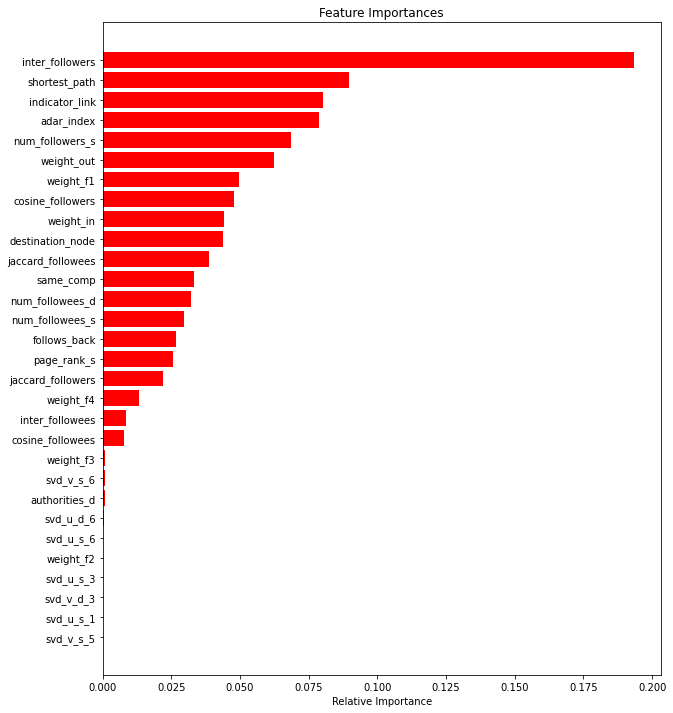

In [47]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
pretty_table = pd.DataFrame(columns = ['Model','Best-Hyper-parameter','Train_f1_score','Test_f1_score','Train-AUC','Test-AUC'])
pretty_table['Model'] = ["Random Forest","XGB"]
pretty_table['Best-Hyper-parameter'] = [best_params_rdsearch,best_params_rndsearch_xgb]
pretty_table['Train_f1_score'] = [train_f1_score_rf,train_f1_score_xgb]
pretty_table['Test_f1_score'] = [test_f1_score_rf,test_f1_score_xgb]
pretty_table['Train-AUC'] = [train_auc_rdfc,train_auc_xgb]
pretty_table['Test-AUC'] = [test_auc_rdfc,test_auc_xgb]
pretty_table['Accuracy'] = [Accuracy_of_Model_rdfc,Accuracy_of_Model_xgb]
pretty_table

,Model,Best-Hyper-parameter,Train_f1_score,Test_f1_score,Train-AUC,Test-AUC,Accuracy
0,Random Forest,"{'max_depth': 14, 'min_samples_leaf': 51, 'min...",1.0,1.0,1.0,1.0,1.0
1,XGB,"{'learning_rate': 0.26203724098816356, 'max_de...",1.0,1.0,1.0,1.0,1.0


**Observations**

Feature engineering on the dataset like finding the shortest path, Katz centrality, Jaccard distances, page rank, preferential attachments,etc were helped to improve machine learning model training, leading to better performance and greater accuracy.It shows that the available data source was also good enough.

Applying SVD Matrix Factorization helps to incorporate implicit feedback  information that is not directly given but can be derived from analyzing user behavior.This will helps our model robust for both seen and unseen data also.

At the end we have plotted the confusion matrix and pretty-table for both XGBoost and Random Forest algorithms found the best hyperparameters we got best accuracy and F1 scores for both training and testing data.